In [11]:
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense # here we are using 2.0 version of tensorflow so don't need to import keras separately
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Flatten

**Problem Statement - Univariate time series forecasting**

[110,125,133,146,158,172,187,196,210]

we will consider last 3 sales records to predict next day sales.

In [13]:
# Data preprocessing

    X                      y
t1    t2   t3
110  125   133           146
125  133   146           158
-----------------------------
-----------------------------
187  196   210            ?

IndentationError: unexpected indent (<ipython-input-13-f36f91a1d40f>, line 3)

In [14]:
# prepare dependent and independent features

def prepare_data(timeseries_data,n_features):
       X,y=[],[]
       for i in range(len(timeseries_data)):
               # find the end of this pattern
               end_ix=i+n_features
               # check if we are beyond the sequence
               if end_ix>len(timeseries_data)-1:
                       break
               # gather input and output parts of the pattern
               seq_x,seq_y=timeseries_data[i:end_ix],timeseries_data[end_ix]
               X.append(seq_x)
               y.append(seq_y)
       return np.array(X),np.array(y)

In [15]:
# define input sequence
timeseries_data=[110,125,133,146,158,172,187,196,210]
# choose number of time_steps
n_steps=3 # means we will consider 3 data to predict next one
# split into samples
X,y=prepare_data(timeseries_data,n_steps)

In [16]:
X,y

(array([[110, 125, 133],
        [125, 133, 146],
        [133, 146, 158],
        [146, 158, 172],
        [158, 172, 187],
        [172, 187, 196]]),
 array([146, 158, 172, 187, 196, 210]))

In [17]:
X.shape,y.shape

((6, 3), (6,))

In [18]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features)) # while working with LSTM always have to reshape your data into 3 dimension

In [22]:
X.shape # now it is converted into 3 dimensional shape

(6, 3, 1)

**Building LSTM Model**

In [20]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu')) # lstm with 50 hidden neurons
model.add(Dense(1)) # output node
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1) # verbose 1 show you output for all epochs

Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 30653.7969
Epoch 2/300
1/1 [==============================] - 0s 18ms/step - loss: 30161.1660
Epoch 3/300
1/1 [==============================] - 0s 20ms/step - loss: 29759.0254
Epoch 4/300
1/1 [==============================] - 0s 17ms/step - loss: 29359.3809
Epoch 5/300
1/1 [==============================] - 0s 19ms/step - loss: 28937.4199
Epoch 6/300
1/1 [==============================] - 0s 17ms/step - loss: 28486.5391
Epoch 7/300
1/1 [==============================] - 0s 17ms/step - loss: 27997.5059
Epoch 8/300
1/1 [==============================] - 0s 13ms/step - loss: 27504.5996
Epoch 9/300
1/1 [==============================] - 0s 14ms/step - loss: 27005.0723
Epoch 10/300
1/1 [==============================] - 0s 16ms/step - loss: 26478.3672
Epoch 11/300
1/1 [==============================] - 0s 13ms/step - loss: 25915.2422
Epoch 12/300
1/1 [==============================] - 0s 16ms/step - loss: 25318.6113
Epo

**Predicting for the next 10 data**

In [21]:
# demonstrate prediction for next 10 days
from numpy import array
x_input = array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):

    if(len(temp_input)>3):
        x_input=array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0]) # 0 means want to skip that data
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1


print(lst_output)

[223.67766]
1 day input [196.         210.         223.67765808]
1 day output [[235.13832]]
2 day input [210.         223.67765808 235.13832092]
2 day output [[249.11461]]
3 day input [223.67766 235.13832 249.11461]
3 day output [[262.83295]]
4 day input [235.13832 249.11461 262.83295]
4 day output [[276.26376]]
5 day input [249.11461 262.83295 276.26376]
5 day output [[291.2707]]
6 day input [262.83295 276.26376 291.2707 ]
6 day output [[306.41812]]
7 day input [276.26376 291.2707  306.41812]
7 day output [[322.04907]]
8 day input [291.2707  306.41812 322.04907]
8 day output [[338.897]]
9 day input [306.41812 322.04907 338.897  ]
9 day output [[356.24878]]
[223.67766, 235.13832, 249.11461, 262.83295, 276.26376, 291.2707, 306.41812, 322.04907, 338.897, 356.24878]


In [23]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [24]:
len(timeseries_data)

9

In [25]:
lst_output

[223.67766,
 235.13832,
 249.11461,
 262.83295,
 276.26376,
 291.2707,
 306.41812,
 322.04907,
 338.897,
 356.24878]

**Visualize the output**

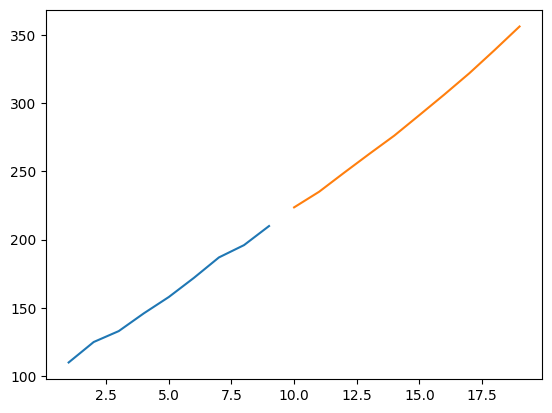

In [28]:
import matplotlib.pyplot as plt

day_new=np.arange(1,10)
day_pred=np.arange(10,20)

plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)   # orange is the forecasted data, # blue is the data that I had.